## Tomato Disease Classification Using Deep Learning

In this project, We will use deep learning to classify tomato diseases. The dataset contains  leaf images  of three categories: healthy leaves, Yellow_Leaf_Curl_Virus-affected leaves, and Bacterial spot-affected leaves. The dataset is downloaded from Kaggle.

At the end of the first part of the lesson,each student will be abble to:
1. Read multiple images in a folder
2. Understand tensorflow and keras
3. Use the matplotlib library to plot images
4. Do data preprocessing


In [1]:
#import librabries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [7]:
images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 'dataset',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
 
)

Found 3000 files belonging to 3 classes.


In [9]:
class_names=images_dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___healthy']

In [10]:
len(images_dataset)

94

In [13]:
#exploring the dataset
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 1 1 2 0 0 1 1 2 2 1 2 2 0 0 2 0 0 0 0 1 2 2 0 2 0 1 1 1]


In [15]:
#print first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())


[[[ 97.  96.  91.]
  [ 97.  96.  91.]
  [ 98.  97.  92.]
  ...
  [ 76.  76.  78.]
  [ 79.  79.  81.]
  [ 82.  82.  84.]]

 [[ 97.  96.  91.]
  [ 97.  96.  91.]
  [ 97.  96.  91.]
  ...
  [ 79.  79.  81.]
  [ 80.  80.  82.]
  [ 82.  82.  84.]]

 [[ 97.  96.  91.]
  [ 97.  96.  91.]
  [ 97.  96.  91.]
  ...
  [ 81.  81.  83.]
  [ 80.  80.  82.]
  [ 80.  80.  82.]]

 ...

 [[150. 155. 148.]
  [150. 155. 148.]
  [149. 154. 147.]
  ...
  [125. 129. 128.]
  [116. 120. 119.]
  [112. 116. 115.]]

 [[150. 155. 148.]
  [150. 155. 148.]
  [149. 154. 147.]
  ...
  [139. 143. 142.]
  [133. 137. 136.]
  [131. 135. 134.]]

 [[150. 155. 148.]
  [150. 155. 148.]
  [149. 154. 147.]
  ...
  [139. 143. 142.]
  [139. 143. 142.]
  [140. 144. 143.]]]


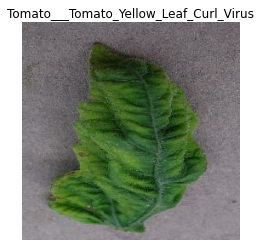

In [25]:
#visualize the first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')


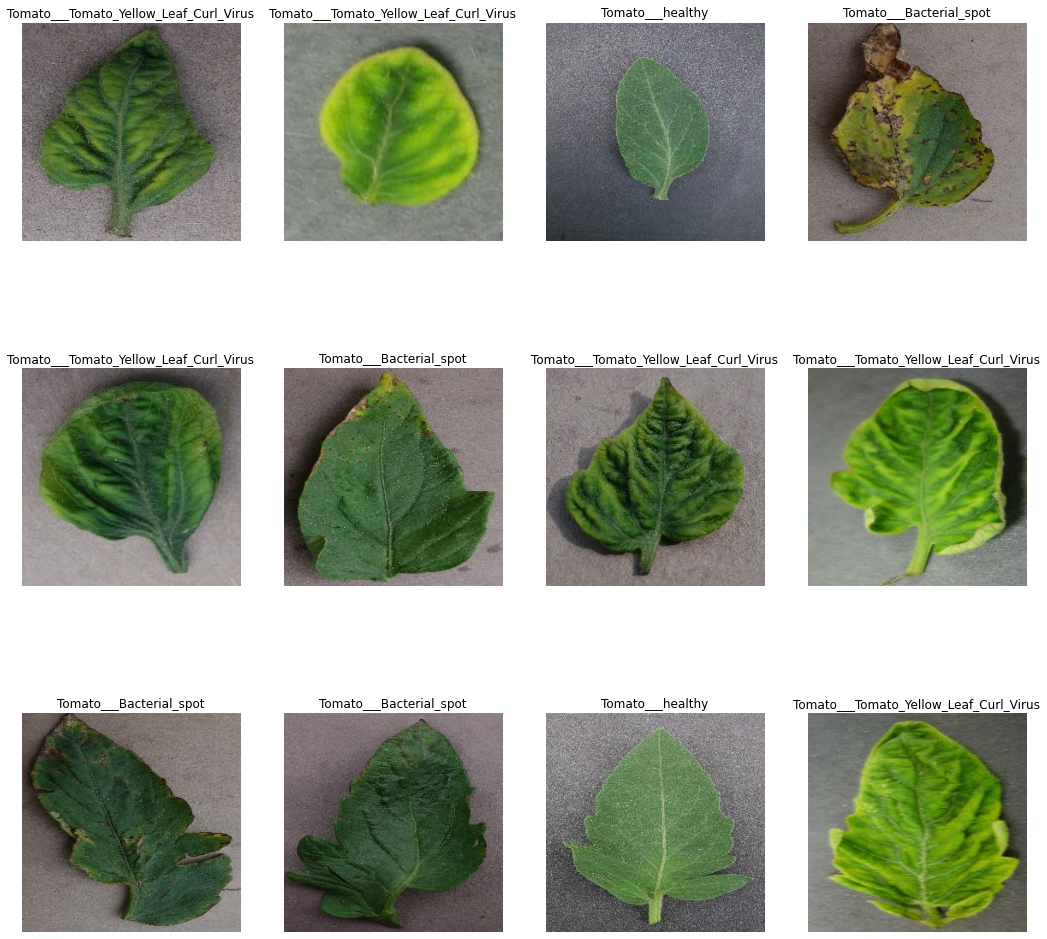

In [28]:
#visualize the first image in that batch
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [29]:
len(images_dataset)

94

In [30]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size= int(train_split* ds_size)
    val_size=int(val_split* ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [33]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)

In [35]:
print(len(train_ds),len(val_ds),len(test_ds))


75 9 10


In [37]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [38]:
resize_and_rescale=tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [39]:
data_augmentation=tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])